### Описание проекта  

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.  

### Описание тарифов  

##### Тариф «Смарт»

- Ежемесячная плата: 550 рублей  
- Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  

###### Стоимость услуг сверх тарифного пакета:  

- минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.)  
- сообщение: 3 рубля  
- 1 Гб интернет-трафика: 200 рублей  

##### Тариф «Ультра»  

- Ежемесячная плата: 1950 рублей  
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  

###### Стоимость услуг сверх тарифного пакета:  

- минута разговора: 1 рубль  
- сообщение: 1 рубль  
- 1 Гб интернет-трафика: 150 рублей  

### Описание данных  

Путь к файлам:  

/datasets/calls.csv  
/datasets/internet.csv  
/datasets/messages.csv  
/datasets/tariffs.csv  
/datasets/users.csv  

## Содержание

### [Шаг 1. Знакомство с данными](#section1)  

### [Шаг 2. Подготовка данных](#section2)  
  - 2.1 Таблица звонков  
  - 2.2 Таблица по интернету  
  - 2.3 Таблица по сообщениям
    
### [Шаг 3. Анализ тарифов](#section3)  
 - 3.1 Тариф smart  
 - 3.2 Тариф ultra 

 
### [Шаг 4. Проверка гипотез](#section4)  
 - 4.1 Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается
 - 4.2 Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

### [Шаг 5. Общий вывод](#section5)  

___

# 1. Первичное знакомство с данными <a class="anchor" id="section1"></a>

___

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

In [2]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul","Aug", "Sep", "Oct", "Nov", "Dec"] # месяцы

In [3]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

### Данные о звонках

In [4]:
calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [5]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [6]:
calls.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


### Данные о пользовании интернетом

In [7]:
internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [8]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


### Данные о сообщениях

In [9]:
messages.head(3)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000


In [10]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


### Информация о трафиках

In [11]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [12]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


### Данные клиентов

In [13]:
users.head(3)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart


In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


# 2. Подготовка данных <a class="anchor" id="section2"></a>

___

### Таблица с информацией по звонкам

In [15]:
datasets = [calls, internet, messages, users]
for df, name in zip(datasets, ['calls', 'internet', 'messages', 'users']):
    print(f"Количество дупликатов в {name} равно {df.duplicated().sum()}")

Количество дупликатов в calls равно 0
Количество дупликатов в internet равно 0
Количество дупликатов в messages равно 0
Количество дупликатов в users равно 0


In [16]:
calls.sample(3)

,id,call_date,duration,user_id
162393,1400_168,2018-12-02,5.97,1400
96223,1244_478,2018-07-03,11.26,1244
100458,1256_111,2018-10-24,13.67,1256


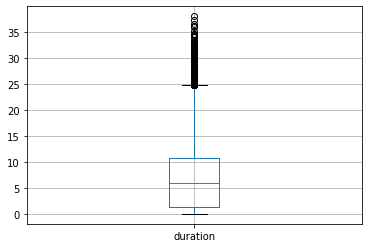

In [17]:
calls.boxplot(['duration'])
plt.show()

> Я думаю, что от выбросов не стоит избавляться, потому что звонок длиной в 30 минут вполне реален и необходимо его учитывать при расчете итоговой стоимости

In [18]:
calls.call_date = pd.to_datetime(calls.call_date, format='%Y-%m-%d') # Переведем в тип datetime
calls.duration = np.ceil(calls['duration']).astype(int) # Округлим вверх продолжительность звонков

In [19]:
print("Среднее по длительности звонков с учетом 0 длительности:", calls['duration'].mean())
print("Среднее по длительности звонков без учета 0 длительности:", calls[calls['duration']>0]['duration'].mean())

Среднее по длительности звонков с учетом 0 длительности: 7.158197890497367
Среднее по длительности звонков без учета 0 длительности: 8.897879676552511


> Пропущенные звонки значительно влияют на среднюю длительность разговора, при этом они не засчитываются в стоимости, избавимся от этих наблюдений

In [20]:
calls = calls[calls['duration']>0] # Избавимся от пропущенных звонков
calls['month'] = calls['call_date'].dt.month # Добавим столбец с месяцем

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Количество сделанных звонков

In [21]:
count_calls_month = calls.pivot_table(index='user_id', columns='month', values='duration', aggfunc='count')
count_calls_month.columns = ["count_calls_"+month for month in months]
count_calls_month = count_calls_month.reset_index()

In [22]:
count_calls_month.head(3)

,user_id,count_calls_Jan,count_calls_Feb,count_calls_Mar,count_calls_Apr,count_calls_May,count_calls_Jun,count_calls_Jul,count_calls_Aug,count_calls_Sep,count_calls_Oct,count_calls_Nov,count_calls_Dec
0,1000,NaN,NaN,NaN,NaN,17.0,28.0,41.0,42.0,46.0,44.0,37.0,38.0
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0,47.0
2,1002,NaN,NaN,NaN,NaN,NaN,14.0,21.0,37.0,25.0,24.0,25.0,27.0


#### Количество минут

In [23]:
sum_calls_month = calls.pivot_table(index='user_id', columns='month', values='duration', aggfunc='sum')
sum_calls_month.columns = ["sum_calls_"+month for month in months]
sum_calls_month = sum_calls_month.reset_index()

In [24]:
sum_calls_month.head(3)

,user_id,sum_calls_Jan,sum_calls_Feb,sum_calls_Mar,sum_calls_Apr,sum_calls_May,sum_calls_Jun,sum_calls_Jul,sum_calls_Aug,sum_calls_Sep,sum_calls_Oct,sum_calls_Nov,sum_calls_Dec
0,1000,NaN,NaN,NaN,NaN,159.0,172.0,340.0,408.0,466.0,350.0,338.0,333.0
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,430.0,414.0
2,1002,NaN,NaN,NaN,NaN,NaN,117.0,214.0,289.0,206.0,212.0,243.0,236.0


### Таблица с информацией по интернету

In [25]:
internet.sample(3)

,Unnamed: 0,id,mb_used,session_date,user_id
145402,145402,1485_24,176.09,2018-12-31,1485
115762,115762,1390_210,812.49,2018-10-03,1390
66384,66384,1226_141,721.52,2018-06-09,1226


In [26]:
internet.session_date = pd.to_datetime(internet.session_date, format='%Y-%m-%d')
internet.mb_used = np.ceil(internet['mb_used']).astype(int)
internet = internet.drop('Unnamed: 0', axis=1) # Удалим столбец Unnamed, он уже есть в индексах
internet['month'] = internet['session_date'].dt.month

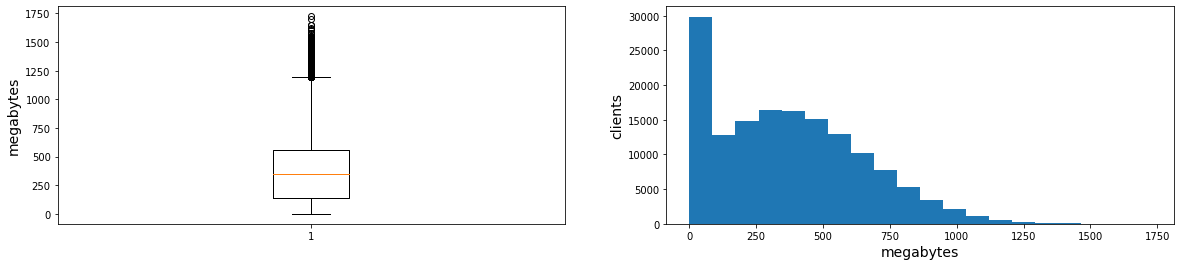

In [27]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,4))

ax1.boxplot(internet['mb_used'])
ax1.set_ylabel('megabytes', fontsize=14)

ax2.hist(internet['mb_used'], bins=20)
ax2.set_xlabel('megabytes', fontsize=14)
ax2.set_ylabel('clients', fontsize=14)

plt.show()

#### Объем израсходованного трафика

In [28]:
sum_internet_month = internet.pivot_table(index='user_id', columns='month', values='mb_used', aggfunc='sum')
sum_internet_month.columns = ["sum_internet_"+month for month in months]
sum_internet_month = sum_internet_month.reset_index()

In [29]:
sum_internet_month.head(3)

,user_id,sum_internet_Jan,sum_internet_Feb,sum_internet_Mar,sum_internet_Apr,sum_internet_May,sum_internet_Jun,sum_internet_Jul,sum_internet_Aug,sum_internet_Sep,sum_internet_Oct,sum_internet_Nov,sum_internet_Dec
0,1000,NaN,NaN,NaN,NaN,2256.0,23257.0,14016.0,14070.0,14581.0,14717.0,14768.0,9827.0
1,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18452.0,14053.0
2,1002,NaN,NaN,NaN,NaN,NaN,10871.0,17601.0,20347.0,16712.0,13905.0,18610.0,18137.0


### Таблица с информацией по сообщениям

In [30]:
messages.sample(3)

,id,message_date,user_id
54022,1239_87,2018-10-15,1239
2401,1005_263,2018-07-11,1005
47634,1211_50,2018-08-16,1211


In [31]:
messages.message_date = pd.to_datetime(messages.message_date, format='%Y-%m-%d')
messages['month'] = messages['message_date'].dt.month

In [32]:
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


#### Количество сообщений по месяцам

In [33]:
count_messages_month = messages.pivot_table(index='user_id', columns='month', values='id', aggfunc='count')
count_messages_month.columns = ["count_messages_"+month for month in months]
count_messages_month = count_messages_month.reset_index()

In [34]:
count_messages_month.head(3)

,user_id,count_messages_Jan,count_messages_Feb,count_messages_Mar,count_messages_Apr,count_messages_May,count_messages_Jun,count_messages_Jul,count_messages_Aug,count_messages_Sep,count_messages_Oct,count_messages_Nov,count_messages_Dec
0,1000,NaN,NaN,NaN,NaN,22.0,60.0,75.0,81.0,57.0,73.0,58.0,70.0
1,1002,NaN,NaN,NaN,NaN,NaN,4.0,11.0,13.0,4.0,10.0,16.0,12.0
2,1003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,91.0,83.0,94.0,75.0


### Помесячная выручка с клиента

In [35]:
virychka = sum_calls_month.merge(sum_internet_month, on='user_id', how='outer')
virychka = virychka.merge(count_messages_month, on='user_id', how='outer')
virychka = virychka.merge(users[['user_id','tariff']], on='user_id', how='left')

In [59]:
# Словари с необходимой информацией по включенным услугам, их стоимости и тарифам
limit = {
    # Включено в стоимость тарифа [message, internet, minute]
    "smart" : [50, 15360, 500],
    "ultra" : [1000, 30720, 3000]
}
prices = {
    # Стоимость дополнительной услуги [message, internet, minute]
    "smart" : [3, (200/1000), 3],
    "ultra" : [1, (150/1000), 1]
}
fee = {
    # Стоимость тарифа
    "smart" : 550,
    "ultra" : 3000
}

In [58]:
def income_counter(row):
    """
    Функция берет на вход ряд из df  'virychka'  и возвращает выручку
    для конкретного пользователя в конкретный месяц
    """
    user_tariff = row['tariff'] 
    minutes = row["sum_calls_"+month]
    megabytes = row["sum_internet_"+month]
    messages = row["count_messages_"+month]
    
    minutes_minus_limit_price = (minutes - limit[user_tariff][2])*prices[user_tariff][2]
    if minutes_minus_limit_price < 0:
        minutes_minus_limit_price = 0
        
    megabytes_minus_limit_price = (megabytes - limit[user_tariff][1])*prices[user_tariff][1]
    if megabytes_minus_limit_price < 0:
        megabytes_minus_limit_price = 0
        
    messages_minus_limit_price = (messages - limit[user_tariff][0])*prices[user_tariff][0]
    if messages_minus_limit_price < 0:
        messages_minus_limit_price = 0
        
    return minutes_minus_limit_price + megabytes_minus_limit_price + messages_minus_limit_price + fee[user_tariff]

In [38]:
for month in months:
    virychka['virychka_'+month] = 0
for month in months:
    virychka["virychka_"+month] = virychka.apply(income_counter, axis=1)

# Шаг 3. Проанализируйте данные <a class="anchor" id="section3"></a>

___

## Тариф smart

In [39]:
smart_table = virychka[virychka["tariff"] == "smart"].replace(0, np.NaN)

In [40]:
calls_smart = smart_table.loc[:,'sum_calls_Jan': 'sum_calls_Dec']
internet_smart = smart_table.loc[:,'sum_internet_Jan': 'sum_internet_Dec']
messages_smart = smart_table.loc[:,'count_messages_Jan': 'count_messages_Dec']

### Распределение длительности звонков по месяцам

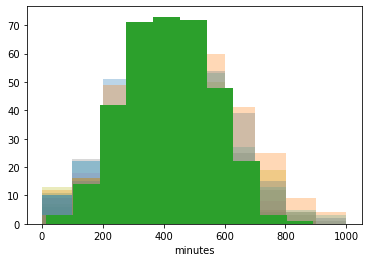

Среднее: 420.8480194908561
Дисперсия: 20578.276241342694
Стандартное откл.: 143.4513026826271


In [41]:
for column in calls_smart.columns.values.tolist():
    plt.hist(calls_smart[column], range=(1,1000), alpha=0.3)
calls_smart['mean_value'] = calls_smart.apply(pd.DataFrame.mean, axis=1) 
plt.hist(calls_smart['mean_value'])
plt.xlabel('minutes')
plt.show()
print("Среднее:", calls_smart['mean_value'].mean())
print("Дисперсия:", calls_smart['mean_value'].var())
print("Стандартное откл.:", calls_smart['mean_value'].std())

### Распределение количества сообщений

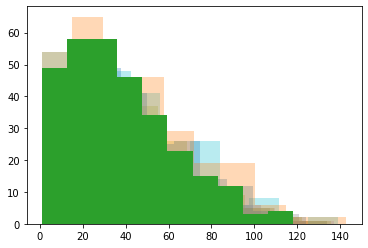

Среднее: 37.57560563057252
Дисперсия: 617.5094965861842
Стандартное откл.: 24.849738360517687


In [42]:
for column in messages_smart.columns.values.tolist():
    plt.hist(messages_smart[column], alpha=0.3)
messages_smart['mean_value'] = messages_smart.apply(pd.DataFrame.mean, axis=1)
plt.hist(messages_smart['mean_value'])
plt.show()
print("Среднее:", messages_smart['mean_value'].mean())
print("Дисперсия:", messages_smart['mean_value'].var())
print("Стандартное откл.:", messages_smart['mean_value'].std())

### Распределение интернет трафика

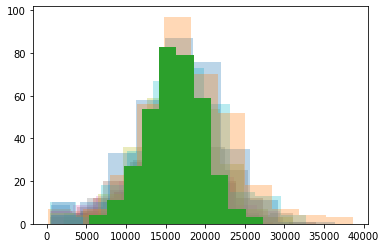

Среднее: 16237.003014945372
Дисперсия: 13156112.194393754
Стандартное откл.: 3627.1355357077236


In [43]:
for column in internet_smart.columns.values.tolist():
    plt.hist(internet_smart[column], alpha=0.3)
internet_smart['mean_value'] = internet_smart.apply(pd.DataFrame.mean, axis=1)
plt.hist(internet_smart['mean_value'])
plt.show()
print("Среднее:", internet_smart['mean_value'].mean())
print("Дисперсия:", internet_smart['mean_value'].var())
print("Стандартное откл.:", internet_smart['mean_value'].std())

### Вывод: 
> 1. В среднем пользователи тарифа  `smart`  тратят 420 минут разговора в месяц из 500 доступных. Стандартное отклонение - 140 минут.  
> 2. Пользователи отправляют 37 сообщений в месяц из 50 доступных, а стандартное отклонение - 25 сбщ.  
> 3. Интернет трафик составляет 16240 мб. из 15360 доступных. Т.е. пользователи охотнее пользуются интернетом и чаще тратят больше трафика, чем включено в тариф.

___

## Тариф ultra

In [44]:
ultra_table = virychka[virychka["tariff"] == "ultra"].replace(0, np.NaN)

In [45]:
calls_ultra = ultra_table.loc[:,'sum_calls_Jan': 'sum_calls_Dec']
internet_ultra = ultra_table.loc[:,'sum_internet_Jan': 'sum_internet_Dec']
messages_ultra = ultra_table.loc[:,'count_messages_Jan': 'count_messages_Dec']

### Распределение звонков

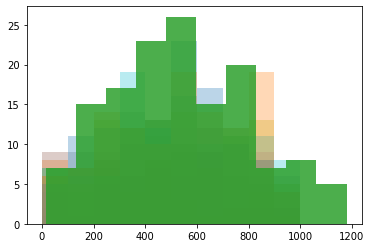

Среднее: 546.9984013461286
Дисперсия: 71872.0671269184
Стандартное откл.: 268.08966247678853


In [46]:
for column in calls_ultra.columns.values.tolist():
    plt.hist(calls_ultra[column], range=(1,1000), alpha=0.3)
calls_ultra['mean_value'] = calls_ultra.apply(pd.DataFrame.mean, axis=1)
plt.hist(calls_ultra['mean_value'], alpha=0.85)
plt.show()
print("Среднее:", calls_ultra['mean_value'].mean())
print("Дисперсия:", calls_ultra['mean_value'].var())
print("Стандартное откл.:", calls_ultra['mean_value'].std())

### Распределение кол-ва сообщений

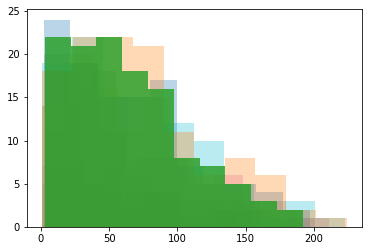

Среднее: 64.55580197132616
Дисперсия: 1882.7452175564713
Стандартное откл.: 43.390612090133864


In [47]:
for column in messages_ultra.columns.values.tolist():
    plt.hist(messages_ultra[column], alpha=0.3)
messages_ultra['mean_value'] = messages_ultra.apply(pd.DataFrame.mean, axis=1)
plt.hist(messages_ultra['mean_value'], alpha=0.85)
plt.show()
print("Среднее:", messages_ultra['mean_value'].mean())
print("Дисперсия:", messages_ultra['mean_value'].var())
print("Стандартное откл.:", messages_ultra['mean_value'].std())

### Распределение пользования интернет-трафиком

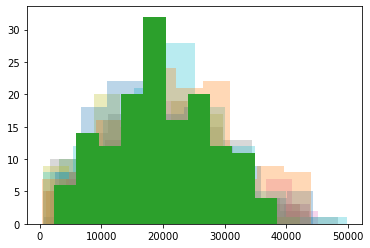

Среднее: 19762.435602134075
Дисперсия: 66869619.030235656
Стандартное откл.: 8177.384608188345


In [48]:
for column in internet_ultra.columns.values.tolist():
    plt.hist(internet_ultra[column], alpha=0.3)
internet_ultra['mean_value'] = internet_ultra.apply(pd.DataFrame.mean, axis=1)
plt.hist(internet_ultra['mean_value'])
plt.show()
print("Среднее:", internet_ultra['mean_value'].mean())
print("Дисперсия:", internet_ultra['mean_value'].var())
print("Стандартное откл.:", internet_ultra['mean_value'].std())

### Вывод: 
> 1. В среднем пользователи тарифа  `ultra`  тратят 546 минут разговора в месяц из 3000 доступных. Т.е. пользователи неохотно пользуются звонками и не тратят все доступные минуты.
> 2. Пользователи отправляют 64 сообщения в месяц из 1000 доступных, а стандартное отклонение - 268 сбщ. Т.е. почти 100% пользователей тарифа  `ultra`  не тратят весь лимит сообщений.
> 3. Интернет трафик составляет 19760 мб. из 30000 доступных со ст. откл. 8200.

# Шаг 4. Проверьте гипотезы <a class="anchor" id="section4"></a>

### Гипотеза: 
> средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Ho - средняя выручка пользователей тарифов не отличаются.  
H1 - выручка отличается

In [49]:
virychka['mean_virychka'] = virychka.loc[:,'virychka_Jan':'virychka_Dec'].apply(pd.DataFrame.mean, axis=1)

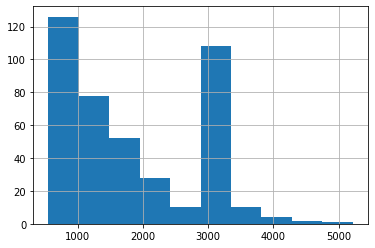

In [50]:
virychka['mean_virychka'].hist()
plt.show()

> Гистограмма явно с двумя пиками - в 550 и 3000, значит многие клиенты укладываются в количество включенных услуг.

In [51]:
virychka1 = virychka.loc[:,'virychka_Jan':'virychka_Dec']
virychka_good = pd.concat([virychka1, virychka['tariff']], axis=1)

virychka_good_smart = virychka_good[virychka_good['tariff']=='smart'].loc[:,'virychka_Jan':'virychka_Dec']
virychka_good_smart['mean_virychka'] = virychka_good_smart.apply(pd.DataFrame.mean, axis=1)

virychka_good_ultra = virychka_good[virychka_good['tariff']=='ultra'].loc[:,'virychka_Jan':'virychka_Dec']
virychka_good_ultra['mean_virychka'] = virychka_good_ultra.apply(pd.DataFrame.mean, axis=1)

In [52]:
alpha = .05

results = st.ttest_ind(virychka_good_smart['mean_virychka'].dropna(), virychka_good_ultra['mean_virychka'].dropna(), equal_var=False) 

print('p-значение:', results.pvalue) # ваш код: выведите на экран получившееся p-значение)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.597412480734673e-146
Отвергаем нулевую гипотезу


>#### Следовательно, наша гипотеза о том, что выручка различается верна

___

### Гипотеза  
> средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Ho - выручка пользователей не отличается.  
H1 - выручка отличается.

In [53]:
columns = ['user_id', 'virychka_Jan', 'virychka_Feb',
       'virychka_Mar', 'virychka_Apr', 'virychka_May', 'virychka_Jun',
       'virychka_Jul', 'virychka_Aug', 'virychka_Sep', 'virychka_Oct',
       'virychka_Nov', 'virychka_Dec']
virychka_cities = virychka[columns]
virychka_cities = virychka_cities.merge(users.loc[:,['user_id', 'city']], on='user_id', how='left')
virychka_cities['mean_virychka'] = virychka_cities.apply(lambda row: np.mean(row[1:-1]), axis=1) # Добавим среднюю выручку

In [54]:
virychka_cities_moscow = virychka_cities[virychka_cities['city']=='Москва']
virychka_cities_other = virychka_cities[virychka_cities['city']!='Москва']

In [55]:
alpha = .05

results = (
    st.ttest_ind(
        virychka_cities_moscow['mean_virychka'].dropna(), 
        virychka_cities_other['mean_virychka'].dropna(), 
        equal_var=False)
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6717296269612512
Не получилось отвергнуть нулевую гипотезу


>#### Гипотеза о том, что выручка пользователей из Москвы и пользователей из других регионов различается не подтвердилась.

# Шаг 5. Общий вывод <a class="anchor" id="section5"></a>

> Таким образом, нами были рассмотрены распределения длительности звонков, количества сообщений, объема израсходованного интернет трафика.  
В среднем, пользователи часто не используют все предоставленные услуги тарифа ultra и, соответственно, переплачивают. Им было бы выгоднее использовать тариф smart.

> Проверены две гипотезы:  
> 1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Подтвердилась.
> 2. Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Не подтвердилась